# Деревья решений

В линейных методах решения задач классификации и регрессии используется существенное предположение о том, что целевая переменная (или какая-то функция от целевой переменной, как в случае с логистической регрессией) зависит от переменных-предикторов $\pm$ линейно. В реальной жизни это, конечно, может быть не так. 

Задолго до появления автоматизированных систем принятия решений (например в банках), многие задачи решались на основе экспертной оценки. Например принятие решения о выдаче или невыдаче кредита могло выглядеть следующим образом:

<img src="https://m.studref.com/htm/img/4/6929/29.png">

С логической точки зрения (да и с точки зрения программирования) такая структура представляет собой длинную цепочку *if-else*'ов, которая в какой-то момент заканчивается некоторым ответом (в нашем примере это выдача или невыдача кредита). По сути, эта последовательность решает задачу бинарной классификации пользователей на тех, кому стоит выдавать кредит и тех, кому не стоит. 

Дерево решений как алгоритм машинного обучения – по сути то же самое: 
Это большой набор объединение *if-else*'ов вида "Значение признака $a$ больше чем $x$? 

Очевидный плюс таких алгоритмов - интерпретируемость. Например, по схеме на рисунке выше легко можно объяснить заемщику или регулятору, в чем причина того, что он не получил кредит. Например, у него нет способа чем-то обеспечить свой кредит. Прямая интерпретируемость, модели - не очень частое свойство и многие другие модели часто выглядят как "черный ящик", который по данным дает некий ответ ответ. Деревья стали очень популярными в том числе из-за своей понятности.

# Как строить деревья

На примере с кредитом видно, что решение о выдаче принималось на основе образования, наличия недвижимости, дохода и других. Какой из признаков нужно выбирать первым?

Представим в игру типа "Кто я такой", показанную в фильме "Бесславные Ублюдки". Герои загадывают друг другу персонажей или знаменитых личностей и пишут их имена на карточках, которые затем приклеивают друг другу на лоб (чтоб человек не знал, кто ему загадан, а все остальные видели). Далее люди по очереди задают другим вопросы, на которые можно отвечать только "да" или "нет", и пытаются отгадать, что за герой загадан. Какой вопрос человеку стоит задать первым делом? Правильно, тот, который максимально сузит область поиска, например "Реальный ли я?". Мало кто сходу начнет спрашивать "Я Винни-Пух?". Именно эта попытка "снизить неопределенность" в области поиска является интуитивным понятием энтропии. 


## Энтропия

Энтропия является мерой беспорядка. Существует много ее видов, но обычно используется следующий.

Для системы, имеющей $N$ различных состояний, энтропия Шеннона равна:
$$S = -\sum^{N}_{i=1}p_i log_2(p_i)$$

Здесь $p_i$ - вероятность найти систему в состоянии $i$. Для иллюстрации возьмем пример [отсюда](https://habr.com/ru/post/171759/)|

Представим, что есть такая последовательность шариков на прямой:

<img src="https://habrastorage.org/webt/mu/vl/mt/muvlmtd2njeqf18trbldenpqvnm.png">

и вы хотите по координате шарика предсказать его цвет. Как надо произвести разбиение?
Мы договорились, что энтропия - мера беспорядка в системе, а значит она должна быть мала, если все объекты принадлежат $\pm$ к одному классу. Посчитаем общую энтропию нашей системы. В ней 9 шариков одного цвета и 11 - другого. Тогда наша энтропия равна:

$$S = - \frac{9}{20}log_2(\frac{9}{20}) - \frac{11}{20}log_2(\frac{11}{20}) \approx 1$$

Разобьем их на две группы:

<img src = "https://habrastorage.org/files/186/444/a8b/186444a8bd0e451c8324ca8529f8d4f4.png">

Как поменялась энтропия теперь?

Слева:

$$S_1 = - \frac{5}{13}log_2(\frac{5}{13}) - \frac{8}{13}log_2(\frac{8}{13}) \approx 0.96$$

Справа:

$$S_1 = - \frac{1}{7}log_2(\frac{1}{7}) - \frac{6}{7}log_2(\frac{6}{7}) \approx 0.6$$

Справа сильно уменьшилась. Слева - не очень. Чтобы понять, что результат стал лучше, надо посчитать "прирост информации" aka **Information Gain**, который определяется для разбиения по признаку А как:

$$IG(A) = S_0 - \frac{N_l}{N}S_l - \frac{N_r}{N}S_r$$

$S_0$ - энтропия до разбиения, $N_l$ и $N_r$ - сколько объектов пошло в правую подвыборку, $S_l$ и $S_r$ - энтропия левой и правой подвыборок.

Отлично, мы научились находить, какой вариант разбиения лучше или хуже. Как дерево-то строить?

## Алгоритм построения дерева

Под капотом популярных алгоритмов построения дерева решений типа [C4.5](https://loginom.ru/blog/decision-tree-c45-1) и [C5.0](https://www.rulequest.com/see5-unix.html), лежит принцип жадной максимизации Information Gain'a. Что означает жадной? Это значит, что на каждом шаге мы выбираем признак, разделив по которому мы получим максимальный Information Gain (технически это может не быть наиболее оптимальным решением). Дальше процедура повторяется рекурсивно (для каждого из поддеревьев), пока энтропия не обнулится (все объекты одного класса) или какой-то маленькой величине (если дерево не подгоняется идеально под обучающую выборку).

В разных алгоритмах применяются разные эвристики для "ранней остановки" или "отсечения", чтобы избежать переобучения (а деревья любят переобучаться, но об этом позже). Псевдокод для дерева выглядит так:

`def build(L):
    # Делаем разбиение
    if Сработал критерий остановки is True:
        назначаем финальный ответ 
    else:
        Ищем наилучшее бинарное разбиение L = L_left + L_right
        t.left = build(L_left)
        t.right = build(L_right)
    return t`

## А есть ли еще критерии разбиения?

Логика с уменьшением энтропии aka увеличением Information Gain'a можем быть чуть обобщена. Дерево строится с помощью некоторого **функционала качества** $Q$ и **критерия информативности** $H$:

$$Q = H_0 - \frac{N_l}{N}H_l - \frac{N_r}{N}H_r$$

В качестве $H$ мы использовали энтропию. Еще одним частым выбором является Критерий Джини (aka Gini's Impurity).

$$G = 1 - \sum_k {p^2_k}$$

Максимизацию такого критерия можно интерпретировать как максимизацию числа пар одного класса, которые оказались в одном поддереве. Но в случае бинарной классификации эти два критерия достаточно похожи:


In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt

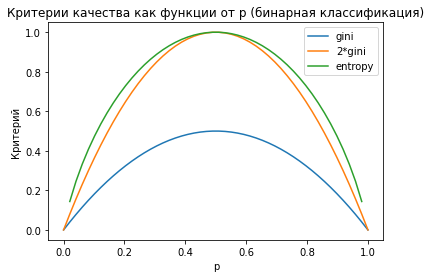

In [2]:
plt.rcParams['figure.figsize'] = (6,4)
xx = np.linspace(0,1,50)
plt.plot(xx, [2 * x * (1-x) for x in xx], label='gini')
plt.plot(xx, [4 * x * (1-x) for x in xx], label='2*gini')
plt.plot(xx, [-x * np.log2(x) - (1-x) * np.log2(1 - x)  for x in xx], label='entropy')
plt.xlabel('p')
plt.ylabel('Критерий')
plt.title('Критерии качества как функции от p (бинарная классификация)')
plt.legend();

## А как работать с количественными признаками?

Ответ простой - дерево не умееь работать с непрерывными переменными. Их надо дискретизировать. 
Количественный признак нужно отсортировать по возрастанию и в дереве перебирать только те пороги, при которых признак меняет значение. 

Но иногда у количественных признаков очень много уникальных значений (например все уникальные), тогда, можно отбирать не все пороги,а только топ-N по приросту выбранного вами критерия. То есть для каждого порога надо построить одно разбиение, посчитать насколько насколько снизилась энтропия или неопределенность Джини и выбрать только N лучших порогов.

Так пороги-то как считать?- спросите вы. 

Допустим, что у нас есть таблица вида:


In [3]:
df = pd.DataFrame({'age':[22,22,43,66,32,45,63,45], 'id':[1,2,3,4,5,6,7,8], 'target':[1,1,1,1,0,0,1,1]})
df.sort_values(by = 'age')

,age,id,target
0,22,1,1
1,22,2,1
4,32,5,0
2,43,3,1
5,45,6,0
7,45,8,1
6,63,7,1
3,66,4,1


Здесь разбиения будут проверяться между 22 и 32 годами по (22+32)/2,  между 32 и 43 по (32+43)/2, между 43 и 45 по (32+43)/2 и по 45. Какое из разбиений будет лучше?

## Погнали деревья строить

Посмотрим на работу дерева решений для случая классификации. Сделаем линейно разделимые выборки и сначала натравим на них логистическую регрессию:

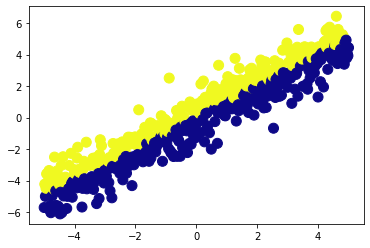

In [4]:
np.random.seed(13)
n = 500
X = np.zeros(shape=(n, 2))
X[:, 0] = np.linspace(-5, 5, 500)
X[:, 1] = X[:, 0] + 1 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='plasma')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_lr[:5]

array([0, 1, 0, 1, 0])

In [7]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred_lr, y_test)

0.9933333333333333

**`!pip install mlxtend`**

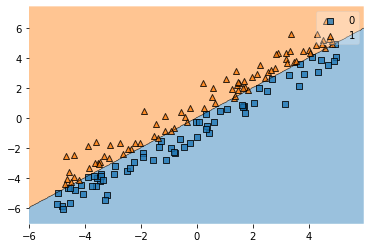

In [8]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test, y_test, lr)

plt.show()

Ну а теперь дерево

In [9]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_pred_dt[:5]

array([0, 1, 0, 1, 0])

In [10]:
accuracy_score(y_pred_dt, y_test)

0.9266666666666666

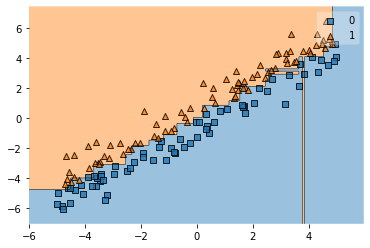

In [11]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

Это что за покемон вертикальный? Это, друзья мои, дерево "слишком подогналось" под выборку. Как видите, у него разделяющая граница состоит из линий, параллельных осям координат. 

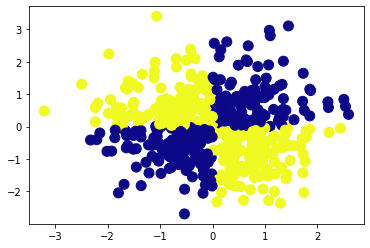

In [12]:
np.random.seed(13)
X = np.random.randn(500, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='plasma')
plt.show()

А вот такой набор точек логистической регрессией явно не разделим. 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
accuracy_score(y_pred_lr, y_test)

0.3933333333333333

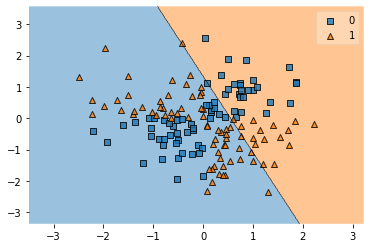

In [15]:
plot_decision_regions(X_test, y_test, lr)
plt.show()

In [16]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_score(y_pred_dt, y_test)

0.98

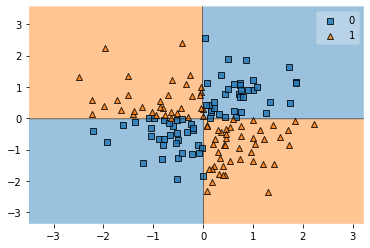

In [17]:
plot_decision_regions(X_test, y_test, dt)
plt.show()

А дереву плевать на нелинейности. Пожалуйста :)

## А для регрессии сработает?

Да, для регрессии тоже сработает :) Но тут , как вы понимаете, функционал качества надо брать другой. Например можно брать и понижать дисперсию прогноза относительно среднего. Вот так:

$$D = \dfrac{1}{l}\sum^l_{i=1}(y_i - \dfrac{1}{l}\sum^l_{i=1}y_i)^2$$

Здесь где $l$ -сколько объектов в листе нашего дерева, а $y$ - значение целевой переменной. Стало быть, если мы минимизируем эту дисперсию, прогнозы внутри одного листа должны становиться максимально близкими друг к другу. А вот пример:

In [18]:
n_train = 150        
n_test = 1000       
noise = 0.1

def function(x):
    return np.exp(-x)*np.cos(x) + 2 * np.exp((x - 2))*np.sin(x)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X)
    y = function(X) + np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

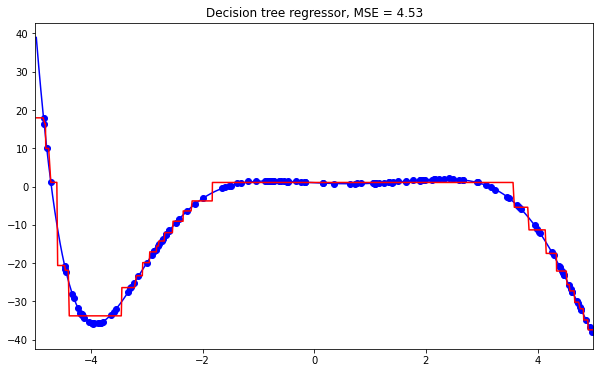

In [19]:
from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=5, random_state=42)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, function(X_test), c='blue')
plt.scatter(X_train, y_train,c='blue')
plt.plot(X_test, reg_tree_pred, c='red')
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.mean((y_test - reg_tree_pred) ** 2))
plt.show()

Как и разделяющая граница для классификации, линия регрессии - кусочно-постоянная функция.

# А что там про переобучение?

Сгенерируем случайные точки. А потом попробуем разбить их деревом на два класса.

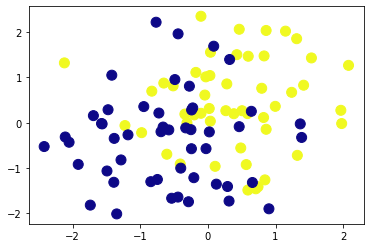

In [20]:
np.random.seed(42)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.5
X[50:, :] -= 0.5
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='plasma')
plt.show()

Какие у дерева есть параметры?

* max_depth: максимальная глубина дерева
* min_samples_leaf: минимальное число объектов в листе дерева

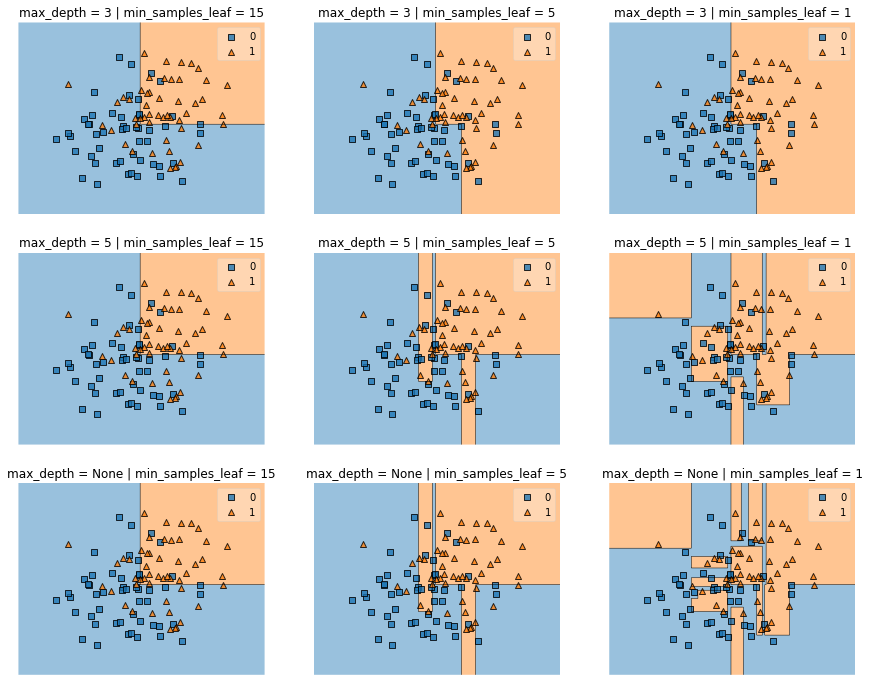

In [21]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([15, 5, 1]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42)
        dt.fit(X, y)
        ax[i][j].set_title('max_depth = {} | min_samples_leaf = {}'.format(max_depth, min_samples_leaf))
        ax[i][j].axis('off')
        plot_decision_regions(X, y, dt, ax=ax[i][j])
plt.show()

Абсолютно на любой выборке можно получить идеальное разделение объектов. Достаточно просто снять ограничения (нижний правый угол)

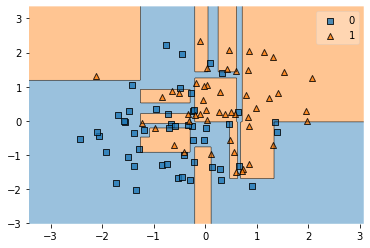

In [22]:
dt = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=42)
dt.fit(X, y)
plot_decision_regions(X, y, dt)
plt.show()

In [23]:
accuracy_score(y, dt.predict(X))

1.0

# Дерево ОООООООООчень неустойчиво по входным данным

Отсюда и переобучения все.

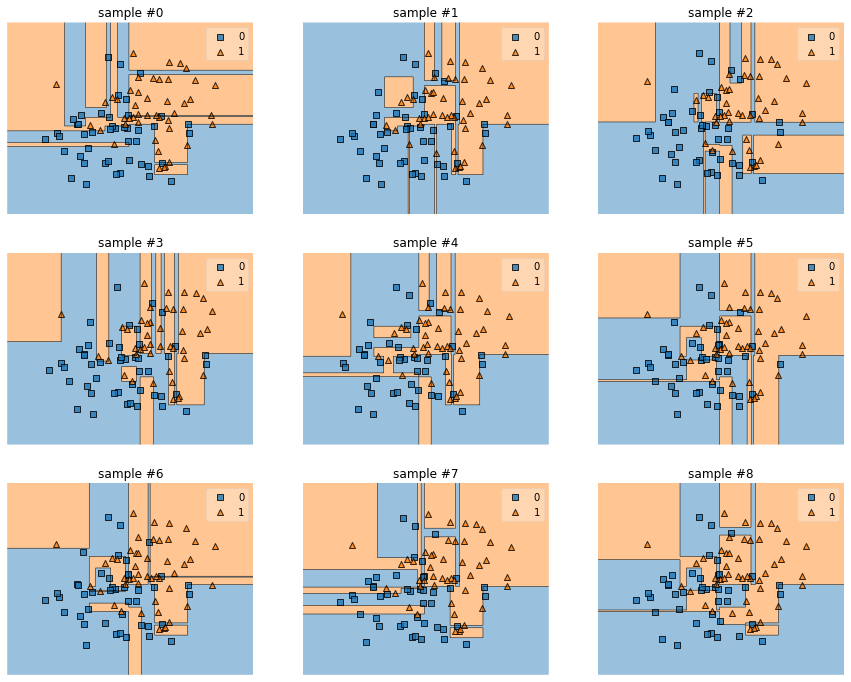

In [24]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=42)
        
        # Выбираем индексы 90% объектов
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        
        # Подгоняем дерево
        dt.fit(X_part, y_part)
        
        # Рисуем разделяющие поверхности
        ax[i][j].set_title('sample #{}'.format(seed_idx))
        ax[i][j].axis('off')
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])
plt.show()

Несмотря на то, что отдельно деревья решений в последнее время применяются не слишком часто, они являются важнейшей составной частью таких алгоритмов композиции, как случайный лес или градиентный бустинг над решающими деревьями, поэтому знать их уж точно не вредно. Давайте посмотрим, как деревья работают сами по себе на задаче предсказания стоимости жилья в Бостоне.

# Пример

In [25]:
from sklearn.datasets import load_boston

In [26]:
boston = load_boston()

In [27]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [28]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [29]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
y = boston['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [30]:
boston['DESCR']

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [31]:
X.shape

(506, 13)

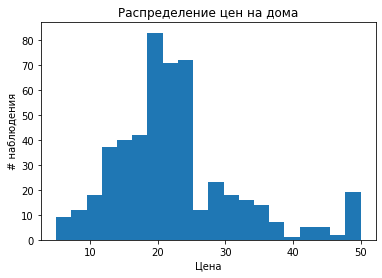

In [32]:
plt.title('Распределение цен на дома')
plt.xlabel('Цена')
plt.ylabel('# наблюдения')
plt.hist(y, bins=20)
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [34]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

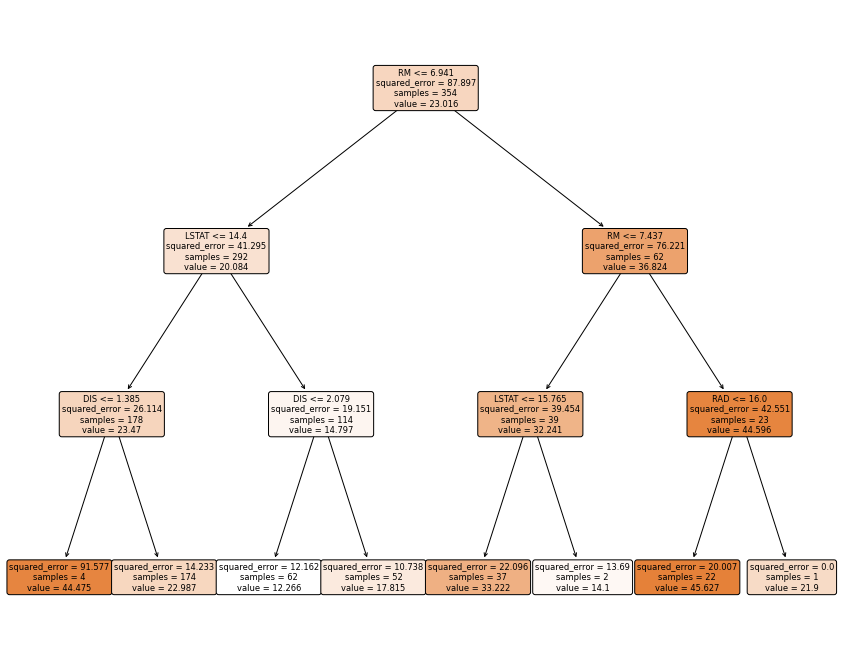

In [35]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
ax = plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, dt.predict(X_test))

19.10730653954883

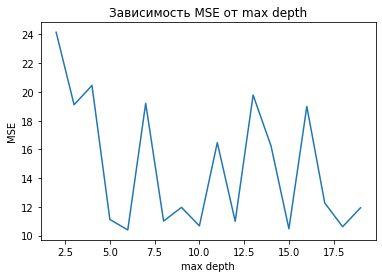

In [37]:
max_depth_array = range(2, 20)
mse_array = []
for max_depth in max_depth_array:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(max_depth_array, mse_array)
plt.title('Зависимость MSE от max depth')
plt.xlabel('max depth')
plt.ylabel('MSE')
plt.show()

In [38]:
pd.DataFrame({'max_depth': max_depth_array,'MSE': mse_array}).sort_values(by='MSE').reset_index(drop=True)

,max_depth,MSE
0,6,10.398734
1,15,10.478539
2,18,10.619605
3,10,10.681865
4,12,10.999091
5,8,11.014540
6,5,11.122130
7,19,11.940461
8,9,11.966747
9,17,12.279114


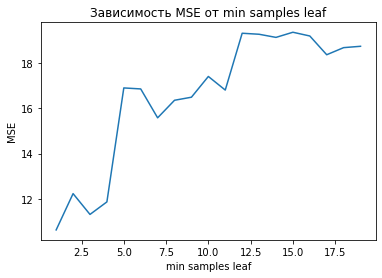

In [39]:
min_samples_leaf_array = range(1, 20)
mse_array = []
for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_leaf_array, mse_array)
plt.title('Зависимость MSE от min samples leaf')
plt.xlabel('min samples leaf')
plt.ylabel('MSE')
plt.show()

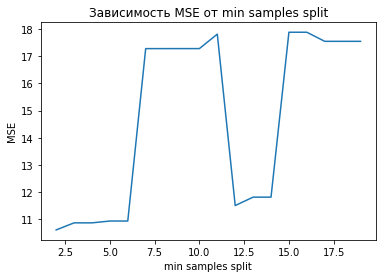

In [40]:
min_samples_split_array = range(2, 20)
mse_array = []
for min_samples_split in min_samples_split_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_split=min_samples_split, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))
plt.plot(min_samples_split_array, mse_array)
plt.title('Зависимость MSE от min samples split')
plt.xlabel('min samples split')
plt.ylabel('MSE')
plt.show()

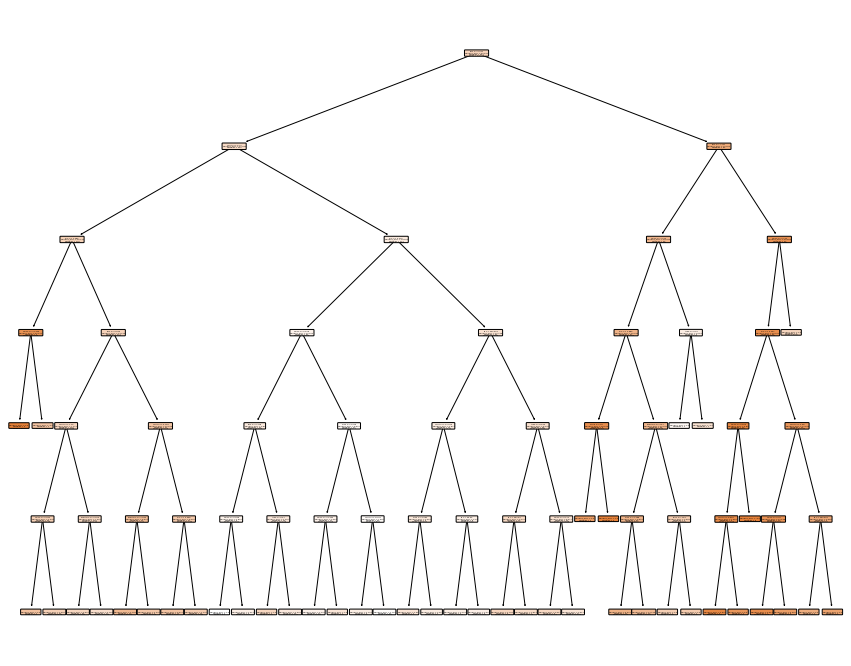

In [41]:
dt = DecisionTreeRegressor(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
ax = plot_tree(dt, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [42]:
mean_squared_error(y_test, dt.predict(X_test))

10.398734204198183

In [43]:
dt.feature_importances_

array([7.03210887e-02, 0.00000000e+00, 0.00000000e+00, 1.28314325e-03,
       4.75412668e-03, 5.97262989e-01, 4.60346229e-03, 1.09479709e-01,
       2.05126613e-05, 0.00000000e+00, 9.66960768e-03, 7.98995631e-03,
       1.94615404e-01])

In [44]:
pd.DataFrame({
    'feature': X.columns,
    'importance': dt.feature_importances_
}).sort_values(by='importance', ascending=False).reset_index(drop=True)

,feature,importance
0,RM,0.597263
1,LSTAT,0.194615
2,DIS,0.109480
3,CRIM,0.070321
4,PTRATIO,0.009670
5,B,0.007990
6,NOX,0.004754
7,AGE,0.004603
8,CHAS,0.001283
9,RAD,0.000021


In [45]:
np.sum(dt.feature_importances_)

1.0

# Масштабирование

Проверим, влияет ли масштабирование признаков на результат работы дерева.

In [46]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13


In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,-0.414259,-0.505125,-1.292142,-0.281546,-0.851085,0.145264,-0.365584,1.081628,-0.746179,-1.112790,0.187271,0.396514,-1.015316
116,-0.402008,-0.505125,-0.162083,-0.281546,-0.087967,-0.208401,0.133941,-0.487876,-0.398464,0.150088,-0.212090,0.387067,-0.053663
45,-0.397211,-0.505125,-0.609489,-0.281546,-0.936828,-0.896237,-1.266900,0.628596,-0.746179,-1.046639,-0.167716,0.428541,-0.311324
16,-0.290936,-0.505125,-0.431970,-0.281546,-0.165136,-0.543965,-1.429789,0.345133,-0.630274,-0.601625,1.207859,0.312760,-0.822422
468,1.457816,-0.505125,1.005500,-0.281546,0.194987,-0.556496,0.079645,-0.403892,1.687825,1.557294,0.852872,0.104124,0.803800


In [48]:
# Шкалирования нет
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test)))

16.92824407559127
10.616299993671864


In [49]:
# Шкалирование есть
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled)))

16.92824407559127
10.616299993671864


In [50]:
sc = MinMaxScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index=X_test.index)
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.000234,0.0,0.036562,0.0,0.150206,0.522066,0.574665,0.448545,0.086957,0.066794,0.648936,0.992990,0.096026
116,0.001377,0.0,0.331700,0.0,0.333333,0.470409,0.716787,0.145541,0.217391,0.467557,0.553191,0.990922,0.284492
45,0.001825,0.0,0.214851,0.0,0.129630,0.369941,0.318229,0.361084,0.086957,0.087786,0.563830,1.000000,0.233996
16,0.011744,0.0,0.261214,0.0,0.314815,0.421395,0.271885,0.306359,0.130435,0.229008,0.893617,0.974658,0.133830
468,0.174971,0.0,0.636638,0.0,0.401235,0.419565,0.701339,0.161755,1.000000,0.914122,0.808511,0.928993,0.452539


In [51]:
# Шкалирование есть
for max_depth in [3, 6]:
    dt = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    dt.fit(X_train_scaled, y_train)
    print(mean_squared_error(y_test, dt.predict(X_test_scaled)))

16.92824407559127
10.616299993671864
